## Problem: Predicting a toyoto corolla car price using Multiple Linear Regression in Python.

### Determinining impacts of diffrent variables on price.

### Model improvement method used : Backward Elimination.

#### Dataset: ToyotaCorolla.csv


##### Consider only the below columns and prepare a prediction model for predicting Price.
##### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

## Step 1 : Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt 
import seaborn as sns 

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import OLSInfluence

import warnings
warnings.filterwarnings('ignore')

# Step 2 : Dataset loading & Data preprocessing

In [3]:
dataset = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape')

In [4]:
dataset.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [5]:
dataset.keys()

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
# Creating dataset with required parameters as mentioned in problem statement.

dataset1 = pd.DataFrame(dataset, columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])

In [7]:
dataset1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
# checking no. of rows for each column

dataset1.count()

Price            1436
Age_08_04        1436
KM               1436
HP               1436
cc               1436
Doors            1436
Gears            1436
Quarterly_Tax    1436
Weight           1436
dtype: int64

In [9]:
dataset1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
dataset1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


* Conclusion step 2: Since all datatype are in int, no null value present. So not required any preprocessing.

### Dividing into Depedent & Independent variable set.

In [12]:
# X is dataset which have all independet variables.

X = dataset1.drop(['Price'], axis=1)
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [13]:
#  Y is dataset which have all dependet variable.

Y = dataset1.iloc[:, 0:1]
Y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


# Step 3: EDA

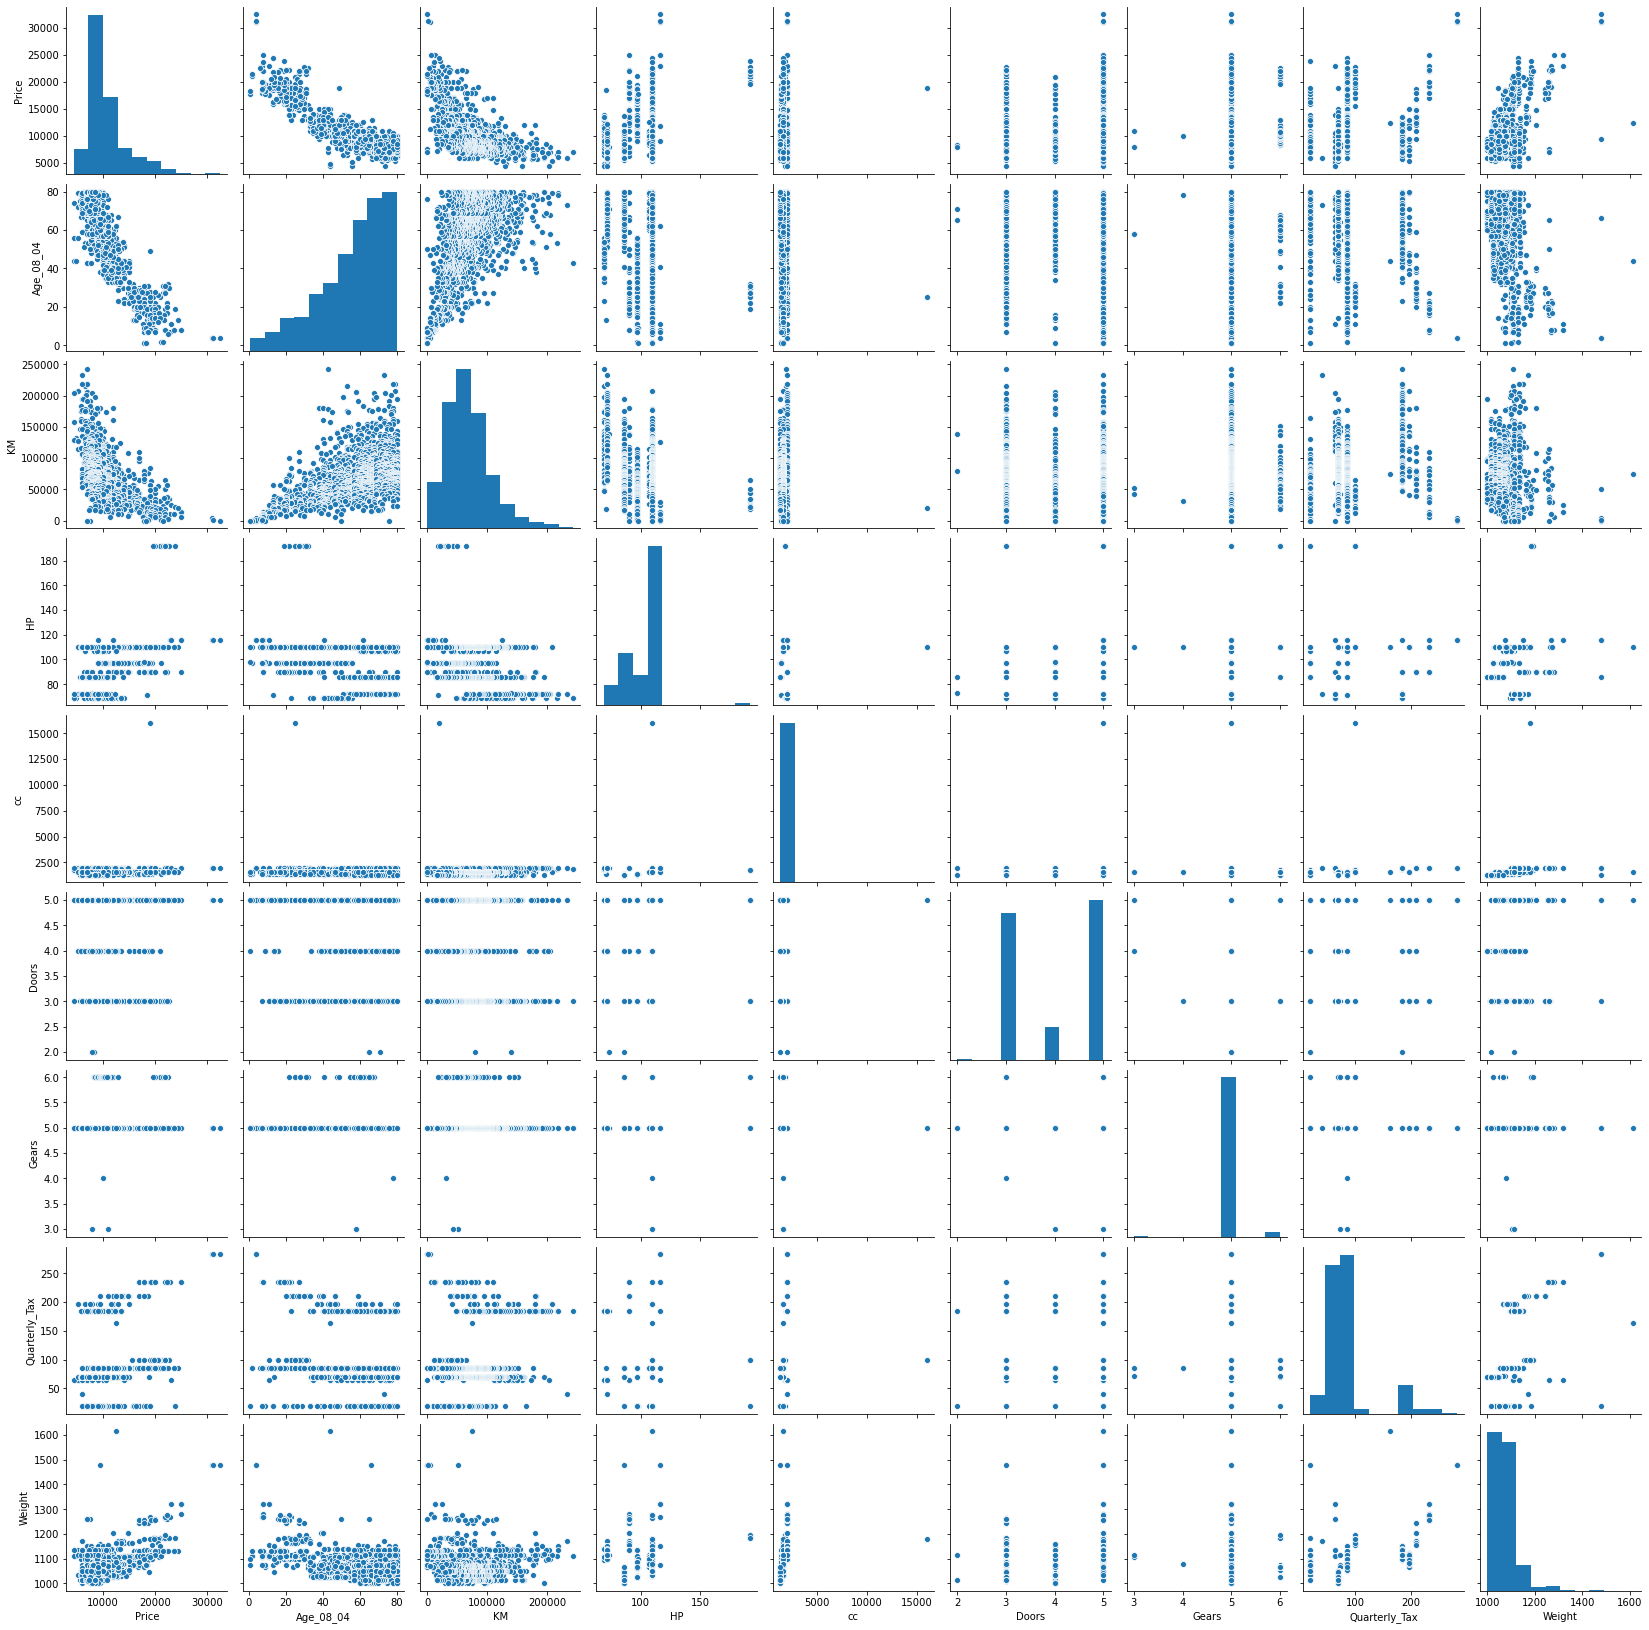

In [14]:
# Checking for distributions of datapoints (Normally distributed or not.)

sns.pairplot(dataset1)

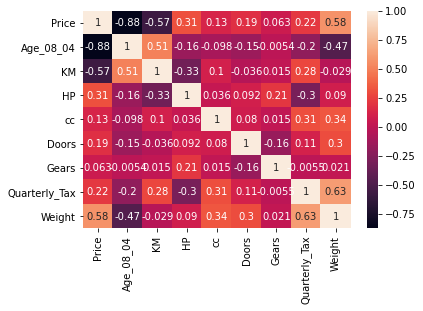

In [15]:
#### Checking correlation between indepedent and indepedent variables.

corr_X_Y = sns.heatmap(dataset1.corr(), annot=True)

* Conclusion: If we check correlation between price-weight(0.58) & price-KM(-0.57). Shows linear & -ve linear relation respectively.
* We can ignore to all other parameters for corr study. Since all remaining indepedent variables are discrete in nature(doors, gears,cc,hp etc) or are fixed in determining.


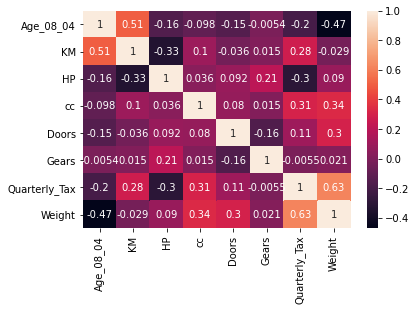

In [16]:
# checking for correlataion among indepedent variables.

Corr_X = sns.heatmap(X.corr(), annot=True)

* Conclusion: There is no correlation among indepedent variables.

# Step 4: Model Building

### Model1

In [17]:
import statsmodels.formula.api as smf

model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = dataset1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:42:53   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Model1 output conclusion:
* R square value: 0.86
* P value for Doors:0.968 >0.05 we can remove this column.

### Model2:

In [18]:
# reemoving Doors column from dataset1 by creating new dataset.

dataset2 = dataset1.drop(['Doors'], axis=1)

In [19]:
dataset2.head()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,5,210,1165
1,13750,23,72937,90,2000,5,210,1165
2,13950,24,41711,90,2000,5,210,1165
3,14950,26,48000,90,2000,5,210,1165
4,13750,30,38500,90,2000,5,210,1170


In [20]:
# Building model 2:

model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:42:53   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Conclusion model2: p value for all indepedent approx '0' except 'cc' which is 0.179
    * But we will keep 'cc' variable and improve model. Since 'cc' is important aspect which gives you engine specification.

### Model 2: Deltation/ Improvement

#### Checking for OLS influence.

In [21]:
from statsmodels.stats.outliers_influence import OLSInfluence

res_df = OLSInfluence(model2).summary_frame().round(3)
res_df.head()

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.038,0.044,0.062,0.006,-0.016,0.004,-0.163,0.049,0.007,-2.478,0.009,-0.236,-2.482,-0.237
1,-0.032,0.059,0.001,-0.005,-0.009,0.006,-0.112,0.039,0.004,-1.886,0.008,-0.173,-1.888,-0.174
2,-0.030,0.028,0.066,0.007,-0.015,0.003,-0.143,0.040,0.005,-2.133,0.009,-0.206,-2.135,-0.206
3,-0.014,0.014,0.030,0.003,-0.007,0.002,-0.073,0.019,0.001,-1.104,0.009,-0.104,-1.104,-0.104
4,-0.013,-0.003,0.075,0.010,-0.012,0.001,-0.123,0.019,0.004,-1.849,0.009,-0.178,-1.851,-0.178


* To check outliers rows will sort top five highest cooks distance.

#### Cooks dist: Model2

In [22]:
sort_coos_d = res_df.sort_values('cooks_d', ascending=False)
sort_coos_d.head(10)

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,0.536,-0.469,-2.390,-2.724,27.094,0.244,-4.012,-2.983,88.260,7.957,0.918,26.572,8.137,27.172
221,2.148,-1.083,0.132,0.606,0.627,-0.035,1.388,-2.955,1.086,-7.496,0.134,-2.947,-7.646,-3.006
960,1.541,-0.821,0.175,0.886,0.332,-0.128,1.497,-2.182,0.603,-5.357,0.144,-2.196,-5.409,-2.218
601,0.705,-0.471,0.408,0.558,-0.093,-0.086,0.659,-0.995,0.152,-6.086,0.032,-1.103,-6.165,-1.117
109,-0.544,0.288,-0.313,0.005,-0.199,-0.028,0.105,0.721,0.136,4.548,0.050,1.043,4.580,1.051
111,-0.433,0.226,-0.244,0.005,-0.159,-0.023,0.082,0.574,0.087,3.635,0.050,0.832,3.651,0.836
110,-0.412,0.211,-0.224,0.006,-0.152,-0.022,0.076,0.547,0.078,3.464,0.050,0.791,3.478,0.794
991,-0.378,-0.050,-0.001,-0.149,0.012,0.661,0.008,-0.058,0.056,-2.158,0.088,-0.671,-2.161,-0.672
654,0.392,-0.156,-0.086,0.234,-0.023,-0.023,0.439,-0.556,0.044,-3.316,0.031,-0.594,-3.328,-0.596
191,0.091,0.239,-0.358,0.283,-0.056,-0.035,0.373,-0.196,0.037,-4.088,0.017,-0.545,-4.110,-0.548


In [23]:
# tables shows row no. 80 having highest cooks distance, also we can check row. no. 221,960,601

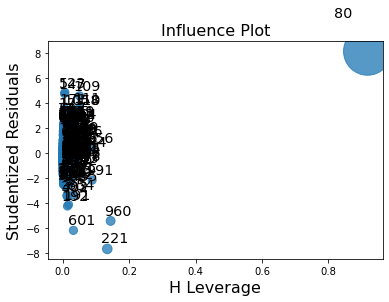

In [24]:
# Also we can check influence plot.

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

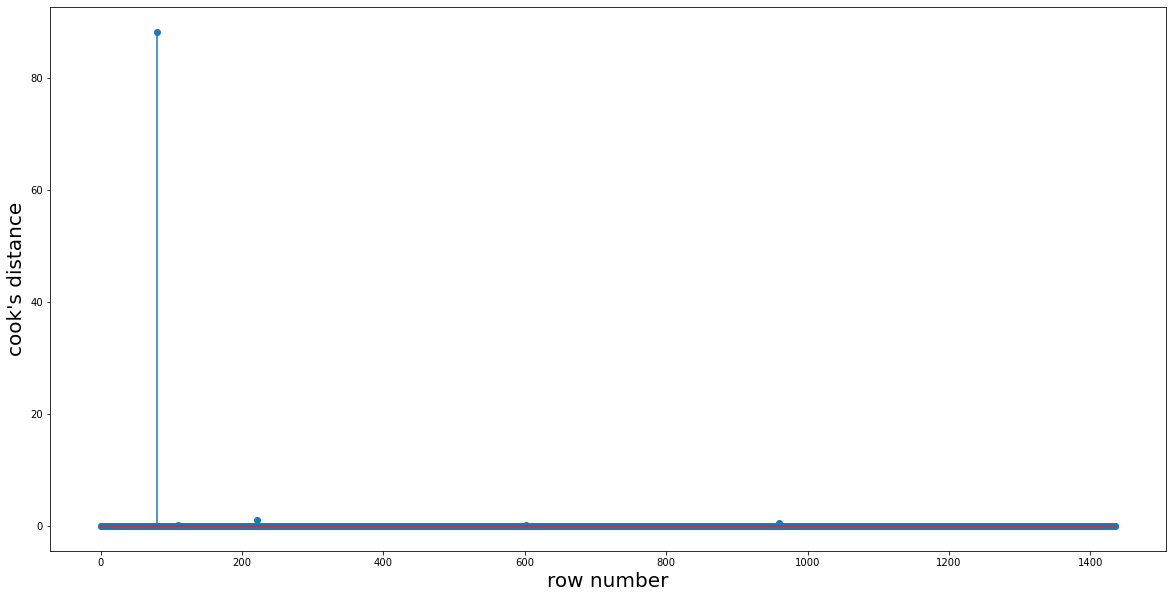

In [25]:
# cook's distance plot

fig = plt.subplots(figsize= (20,10))
plt.stem(np.arange(len(dataset1)), res_df['cooks_d'])
plt.tick_params(axis='both', which='major', labelsize=10) 
plt.ylabel("cook's distance", fontsize = 20)
plt.xlabel("row number", fontsize = 20)
plt.show()

* Conclusion: row no. 80 show far away from all other points(cooks distance is so high)

#### Dataset2 value replace

In [26]:
# Viewing 80th row from dataset2.

dataset2.iloc[80:83]


,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,100,1180
81,17250,29,20000,110,1600,5,85,1115
82,15450,25,17003,97,1400,5,85,1110


* it seems to be wrong entry done with 'cc' for 80th row as comapred next two rows. Now will cross verify with 'cc' column min, max, mode etc.
* the one point need to be consider is 16000cc engine for car not possible at all. It mignt be dataentry problem that is data is wrongly inserted.
* Also HP value is showing 110 for 16000cc engine which is not correct from technical point.

In [27]:
dataset2.cc.unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [28]:
dataset2.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

<AxesSubplot:xlabel='cc', ylabel='Weight'>

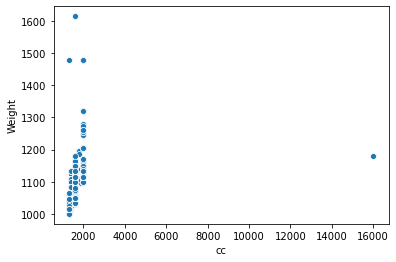

In [29]:
sns.scatterplot(x='cc', y='Weight', data= dataset2)

* Conclusion we will replace cc vakue for 80th row obs. as 1600
* In general we need to ask management/concern person to edit or adding/updating values in given dataset.


In [30]:
# replacing 80th row 'cc' column observation by 1600

dataset2['cc'].replace({80:1600})

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1431    1300
1432    1300
1433    1300
1434    1300
1435    1600
Name: cc, Length: 1436, dtype: int64

In [31]:
dataset2.iloc[80:81]

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,100,1180


### Model3

In [32]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = dataset2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        22:42:58   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Conclusion : By replacing 80th rwo obs.(as per python index) obs. for 'cc' column the p_value for cc comes to '0'. 
*  All p values become zero now. that means all indepedent variables are significant features.

In [33]:
from statsmodels.stats.outliers_influence import OLSInfluence

res_df3 = OLSInfluence(model3).summary_frame().round(3)
res_df3.sort_values('cooks_d', ascending=False).head()

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,0.536,-0.469,-2.390,-2.724,27.094,0.244,-4.012,-2.983,88.260,7.957,0.918,26.572,8.137,27.172
221,2.148,-1.083,0.132,0.606,0.627,-0.035,1.388,-2.955,1.086,-7.496,0.134,-2.947,-7.646,-3.006
960,1.541,-0.821,0.175,0.886,0.332,-0.128,1.497,-2.182,0.603,-5.357,0.144,-2.196,-5.409,-2.218
601,0.705,-0.471,0.408,0.558,-0.093,-0.086,0.659,-0.995,0.152,-6.086,0.032,-1.103,-6.165,-1.117
109,-0.544,0.288,-0.313,0.005,-0.199,-0.028,0.105,0.721,0.136,4.548,0.050,1.043,4.580,1.051


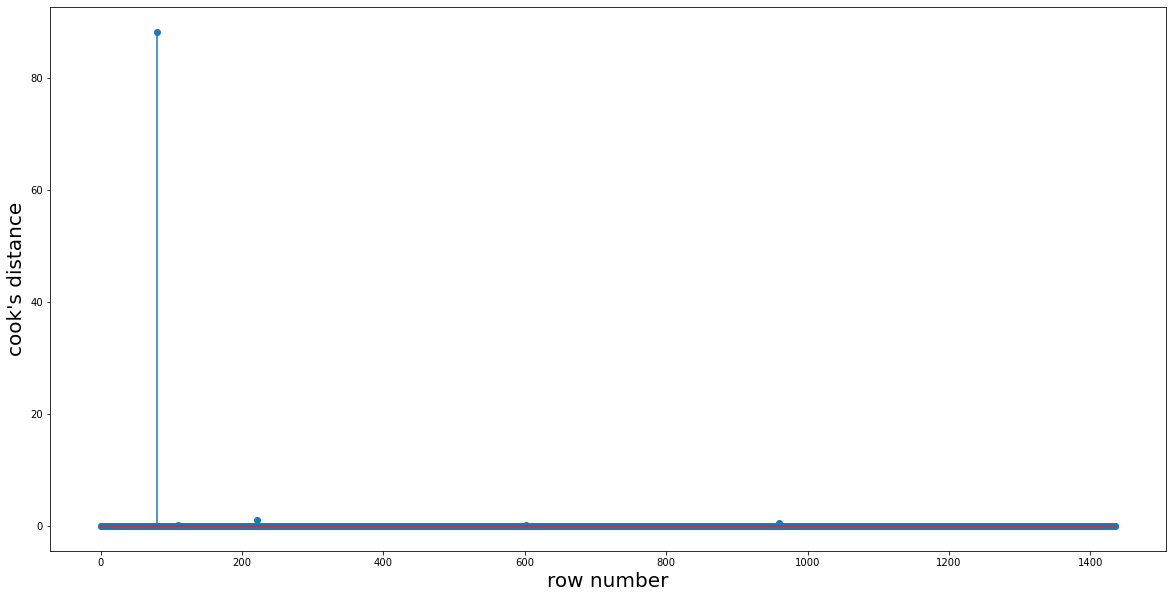

In [34]:
# cook's distance plot

fig = plt.subplots(figsize= (20,10))
plt.stem(np.arange(len(dataset1)), res_df3['cooks_d'])
plt.tick_params(axis='both', which='major', labelsize=10) 
plt.ylabel("cook's distance", fontsize = 20)
plt.xlabel("row number", fontsize = 20)
plt.show()

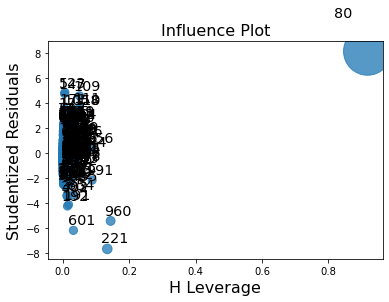

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

In [36]:
# calculating leverage value
# it helps to decide beyond leverage value row numbers are outliers.

#dataset2.shape       (1436, 8)

k=8;n=1436
leverage = 3*((k+1)/n)
leverage

0.018802228412256268

* Leverage is very low, that means more rows will be fall as outliers. So will avoid it for now.

* Conclusion : We will check for row no. 960 & 221. what are the obs. making rows as outliers

In [37]:
dataset2.iloc[[221,960]]

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,163,1615
960,9390,66,50806,86,1300,5,19,1480


Since we can't decide is really deleting data rows not meaningfull. We will stop here.
model3 will be best fitted model. will check for other parameter.

In [38]:
# Dividing dataset3 into depdent and independent variables.

Y3 = dataset2.iloc[:, 0:1]
Y3= Y3.rename(columns={'Price':'Actual Price'})
X3 = dataset2.drop(['Price'], axis=1)

## Step 5: Predicting results

In [53]:
predict = model3.predict(X3)
predict = pd.DataFrame(predict, columns=['Predicted Price'])
predict.head()

,Predicted Price
0,16810.494470
1,16270.230185
2,16798.654675
3,16424.410164
4,16220.293832


In [40]:
Comparison = pd.concat([Y3, predict],  axis='columns').round(2)
Comparison.head(10)

,Actual Price,Predicted Price
0,13500,16810.49
1,13750,16270.23
2,13950,16798.65
3,14950,16424.41
4,13750,16220.29
5,12950,15508.56
6,16900,16688.18
7,18600,16712.99
8,21500,20050.88
9,12950,14538.96


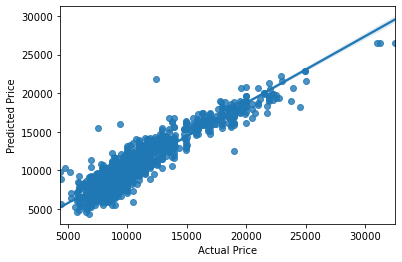

In [41]:
sns.regplot(x='Actual Price', y='Predicted Price', data = Comparison)
plt.show()


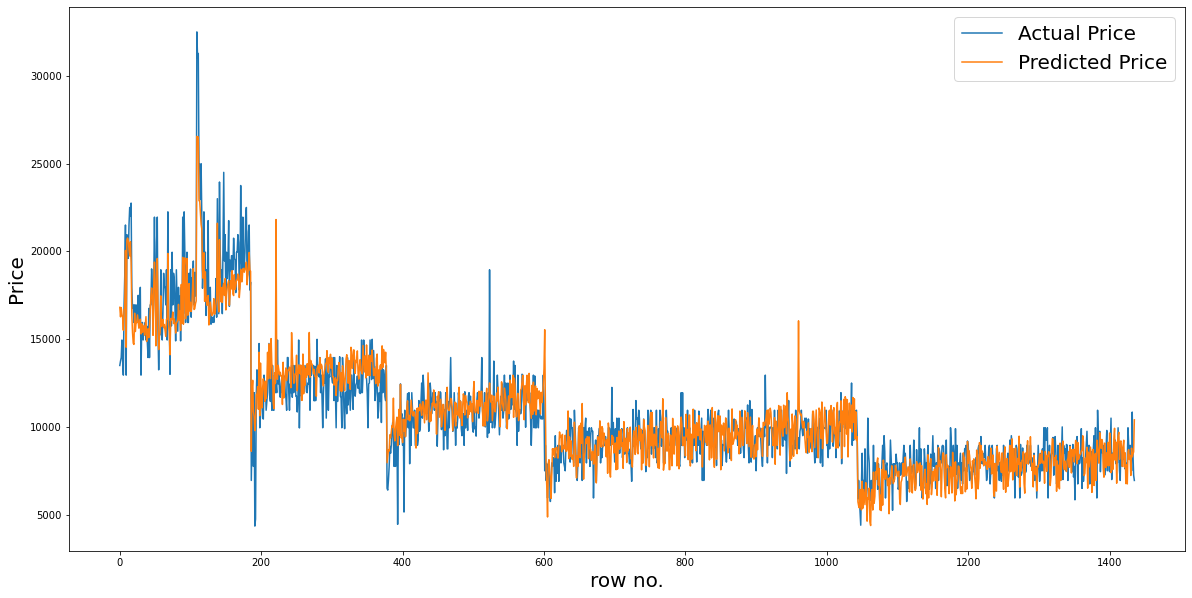

In [42]:
# Plotting scatter plot predict vas actual

Comparison['Actual Price'].plot(label = 'Actual Price', figsize=(20,10))
Comparison['Predicted Price'].plot(label = 'Predicted Price', figsize=(20,10))
plt.xlabel('row no.', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.legend(fontsize=20);
plt.show()

## Final Conclusion: 
* It shows predicted prices are lower than actual prices.
* Best model is model3 (where Doors variable excluded)
* R-squared:	0.864
* R-squared:	0.863

## Step 6: Building predict model input dataframe

In [44]:
Age = int(input('selct car age:'))
KM = float(input('eselect total car running:'))
HP = int(input('Select HP:'))
CC = int(input('Select CC:'))
Gears = int(input('Select Gears:'))
Quarterly_Tax = int(input('Quarterly_Tax:'))
Weight = int(input('Select Weight:'))

def inputs(Age_08_04,KM,HP,CC,Gears,Quarterly_Tax,Weight):
    new_data=pd.DataFrame({'Age_08_04':Age,"KM":KM,"HP":HP, "cc":CC, "Gears":Gears, "Quarterly_Tax":Quarterly_Tax, "Weight":Weight},index=[1])
    final_predict = model3.predict(new_data)
    final_predict

selct car age:10
eselect total car running:10
Select HP:10
Select CC:10
Select Gears:10
Quarterly_Tax:10
Select Weight:10


## Step 7: Deploying Using streamlit

* We will make separate python file for deployment code.
* From this jupyter notebook, will pickle model3 & use it in deployment file.

In [47]:
import pickle

model = model3
pickle.dump(model, open('model.p','wb'))

#### This last code of this file. Deployment code is writtten in seperate py file using streamlit.